## 5.2　グリッドサーチ

In [100]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid, StratifiedKFold

In [116]:
np.set_printoptions(precision=3, floatmode='maxprec')

### 5.2.1　単純なグリッドサーチ

In [101]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print('Size of training set: {}'.format(X_train.shape[0]))
print('Size of test set: {}'.format(X_test.shape[0]))

Size of training set: 112
Size of test set: 38


In [102]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print(('Best score: {:.2f}'.format(best_score)))
print('Best parameters: {}'.format(best_parameters))

Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


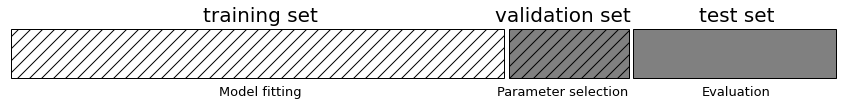

In [103]:
mglearn.plots.plot_threefold_split()

In [104]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print('Size of training set: {}'.format(X_train.shape[0]))
print('Size of validation set: {}'.format(X_valid.shape[0]))
print('Size of test set: {}'.format(X_test.shape[0]))

Size of training set: 84
Size of validation set: 28
Size of test set: 38


In [105]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print('Best score on validation set: {:.2f}'.format(best_score))
print('Best parameters: ', best_parameters)
print('Test set score with best parameters: {:.2f}'.format(test_score))

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### 5.2.3　交差検証を用いたグリッドサーチ

In [106]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
        
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print('Best score on validation set: {:.2f}'.format(best_score))
print('Best parameters: ', best_parameters)
print('Test set score with best parameters: {:.2f}'.format(test_score))

Best score on validation set: 0.97
Best parameters:  {'C': 10, 'gamma': 0.1}
Test set score with best parameters: 0.97


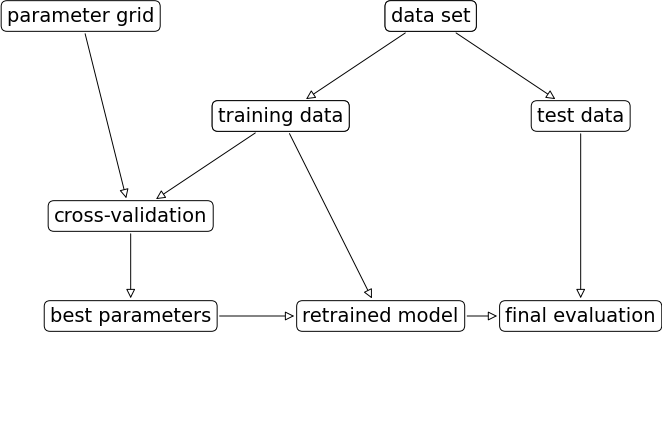

In [107]:
mglearn.plots.plot_grid_search_overview()

上記の交差検証を用いたグリッドサーチは、`GridSearchCV` を使うと簡単に実行できる。

In [108]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_trainval, y_trainval)

print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))
print('Best parameters: {}', grid_search.best_params_)
print('Test set score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Best cross-validation score: 0.97
Best parameters: {} {'C': 10, 'gamma': 0.1}
Test set score: 0.97


In [109]:
print('Best estimator: \n{}'.format(grid_search.best_estimator_))

Best estimator: 
SVC(C=10, gamma=0.1)


#### 5.2.3.1　交差検証の結果の解析

In [110]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000841,0.000093,0.000339,0.000044,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000803,0.000035,0.000322,0.000024,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000764,0.000007,0.000308,0.000003,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000766,0.000008,0.000325,0.000039,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000780,0.000024,0.000311,0.000007,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


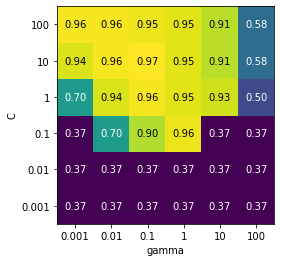

In [111]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

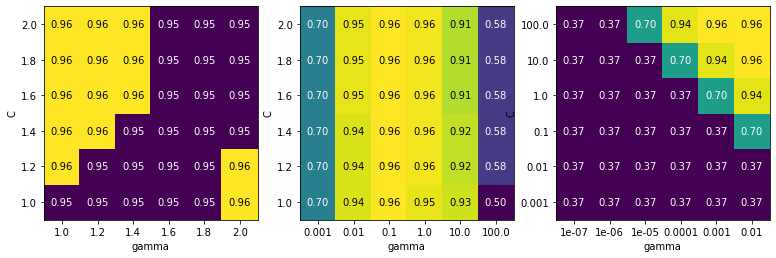

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_trainval, y_trainval)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C',
                                         xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis', ax=ax)

#### 5.2.3.2　グリッドでないサーチ空間

In [113]:
param_grid = [
    {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_trainval, y_trainval)

print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))
print('Best parameters: {}', grid_search.best_params_)
print('Test set score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Best cross-validation score: 0.97
Best parameters: {} {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test set score: 0.97


In [114]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T.iloc[:, 37:])

,37,38,39,40,41
mean_fit_time,0.000475,0.000328,0.000287,0.000288,0.000289
std_fit_time,0.000026,0.000002,0.000007,0.000011,0.000019
mean_score_time,0.000174,0.000147,0.000133,0.000133,0.000132
std_score_time,0.000015,0.000001,0.000002,0.000005,0.000006
param_C,0.01,0.1,1,10,100
param_gamma,NaN,NaN,NaN,NaN,NaN
param_kernel,linear,linear,linear,linear,linear
params,"{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.869565,0.913043,0.956522,1.0,0.956522


#### 5.2.3.4　ネストした交差検証

In [119]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)

print('Cross-validation scores: ', scores)
print('Mean cross-validation score: ', round(scores.mean(), 3))

Cross-validation scores:  [0.967 1.    0.9   0.967 1.   ]
Mean cross-validation score:  0.967


In [122]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        
        for parameters in parameter_grid:
            cv_scores = []
            
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                
                score = clf.score(X[inner_train], y[inner_train])
                cv_scores.append(score)
                
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
                
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
        
    return np.array(outer_scores)

In [123]:
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [1.    0.9   0.867 0.967 0.967]


これまで `train_test_split` で `trainval` と `test` に分けていたものを、層化 5 分割交差検証 `StatifiedKFold` での分割に変更した。